In [76]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages

In [28]:
npcr = pd.read_csv('C:/Users/lzoeckler/Desktop/namibia_PCR/HRP2 persistence study data for PATH_27Jan2020.csv')
npcr.head()

,pa_id,age,sex,day0_enrollee,days_since_detection_enroll,time_to_negativity_urdt,where_detected,enroll_hrp2_pg_ml,d3_hrp2_pg_ml,d7_hrp2_pg_ml,...,d70_qpcr_p_density,d77_qpcr_p_density,d84_qpcr_p_density,d91_qpcr_p_density,d98_qpcr_p_density,d105_qpcr_p_density,d112_qpcr_p_density,d119_qpcr_p_density,d126_qpcr_p_density,d133_qpcr_p_density
0,PA-001,2,Female,1,0,29,Health Facility,NaN,318702.59,73737.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PA-002,80,Female,1,0,35,Health Facility,43928722.05,930087.39,179497.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PA-003,23,Female,0,5,66,Health Facility,251849.37,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PA-004,17,Female,1,0,56,Health Facility,46391.5,12.11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PA-005,21,Male,1,0,71,Health Facility,7872641.8,NaN,391686.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
core_cols = ['pa_id', 'age', 'sex', 'day0_enrollee', 'days_since_detection_enroll',
             'time_to_negativity_urdt', 'where_detected']
hrp2_cols = [col for col in npcr.columns if 'hrp2_pg_ml' in col]
qpcr_cols = [col for col in npcr.columns if 'qpcr_p_density' in col]

In [30]:
hrp2_df = npcr[core_cols + hrp2_cols]
qpcr_df = npcr[core_cols + qpcr_cols]

In [31]:
for col in hrp2_cols:
    if 'enroll' in col:
        new_col = '0'
    else:
        new_col = col.split('_')[0]
        new_col = new_col.strip('d')
    hrp2_df.rename(columns={col: new_col}, inplace=True)
hrp2_df.head()

C:\Users\lzoeckler\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,pa_id,age,sex,day0_enrollee,days_since_detection_enroll,time_to_negativity_urdt,where_detected,0,3,7,...,70,77,84,91,98,105,112,119,126,133
0,PA-001,2,Female,1,0,29,Health Facility,NaN,318702.59,73737.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PA-002,80,Female,1,0,35,Health Facility,43928722.05,930087.39,179497.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PA-003,23,Female,0,5,66,Health Facility,251849.37,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PA-004,17,Female,1,0,56,Health Facility,46391.5,12.11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PA-005,21,Male,1,0,71,Health Facility,7872641.8,NaN,391686.21,...,417.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
for col in qpcr_cols:
    if 'enroll' in col:
        new_col = '0'
    else:
        new_col = col.split('_')[0]
        new_col = new_col.strip('d')
    qpcr_df.rename(columns={col: new_col}, inplace=True)
qpcr_df.head()

,pa_id,age,sex,day0_enrollee,days_since_detection_enroll,time_to_negativity_urdt,where_detected,3,7,14,...,70,77,84,91,98,105,112,119,126,133
0,PA-001,2,Female,1,0,29,Health Facility,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PA-002,80,Female,1,0,35,Health Facility,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PA-003,23,Female,0,5,66,Health Facility,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PA-004,17,Female,1,0,56,Health Facility,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PA-005,21,Male,1,0,71,Health Facility,NaN,NaN,0.223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
hrp2_vars = [col for col in hrp2_df.columns if col.isdigit()]
hrp2_df = pd.melt(hrp2_df, id_vars=core_cols, value_vars=hrp2_vars,
                  var_name='timepoint_days', value_name='hrp2_pg_ml')
hrp2_df.head()

,pa_id,age,sex,day0_enrollee,days_since_detection_enroll,time_to_negativity_urdt,where_detected,timepoint_days,hrp2_pg_ml
0,PA-001,2,Female,1,0,29,Health Facility,0,NaN
1,PA-002,80,Female,1,0,35,Health Facility,0,43928722.05
2,PA-003,23,Female,0,5,66,Health Facility,0,251849.37
3,PA-004,17,Female,1,0,56,Health Facility,0,46391.5
4,PA-005,21,Male,1,0,71,Health Facility,0,7872641.8


In [34]:
qpcr_vars = [col for col in qpcr_df.columns if col.isdigit()]
qpcr_df = pd.melt(qpcr_df, id_vars=core_cols, value_vars=qpcr_vars,
                  var_name='timepoint_days', value_name='qpcr_p_density')
qpcr_df.head()

,pa_id,age,sex,day0_enrollee,days_since_detection_enroll,time_to_negativity_urdt,where_detected,timepoint_days,qpcr_p_density
0,PA-001,2,Female,1,0,29,Health Facility,3,NaN
1,PA-002,80,Female,1,0,35,Health Facility,3,NaN
2,PA-003,23,Female,0,5,66,Health Facility,3,NaN
3,PA-004,17,Female,1,0,56,Health Facility,3,NaN
4,PA-005,21,Male,1,0,71,Health Facility,3,NaN


In [35]:
def compare_clean(val):
    if isinstance(val, str):
        try:
            return float(val)
        except ValueError:
            return val
    elif isinstance(val, float) or isinstance(val, int):
        return val
    else:
        raise

In [36]:
combo_df = pd.merge(hrp2_df, qpcr_df, how='outer')
combo_df['pa_id'] = combo_df['pa_id'].apply(str.lower)
combo_df['timepoint_days'] = combo_df['timepoint_days'].apply(int)
combo_df = combo_df.loc[~combo_df['hrp2_pg_ml'].isnull()]
combo_df['hrp2_pg_ml'] = combo_df['hrp2_pg_ml'].apply(compare_clean)
combo_df.loc[combo_df['timepoint_days'] != 0, 'timepoint_days'] = combo_df['timepoint_days'].subtract(
    combo_df['days_since_detection_enroll'])
combo_df.rename(columns={'pa_id': 'participant_id', 'age': 'age_yrs', 'hrp2_pg_ml': 'quansys_HRP2_pg_ml'}, inplace=True)
combo_df.head()

,participant_id,age_yrs,sex,day0_enrollee,days_since_detection_enroll,time_to_negativity_urdt,where_detected,timepoint_days,quansys_HRP2_pg_ml,qpcr_p_density
1,pa-002,80,Female,1,0,35,Health Facility,0,4.39287e+07,NaN
2,pa-003,23,Female,0,5,66,Health Facility,0,251849,NaN
3,pa-004,17,Female,1,0,56,Health Facility,0,46391.5,NaN
4,pa-005,21,Male,1,0,71,Health Facility,0,7.87264e+06,NaN
5,pa-006,39,Female,0,10,30,Health Facility,0,1849.23,NaN


In [37]:
base_namib = pd.read_csv('C:/Users/lzoeckler/Desktop/all_data/separated/18-UCSF-01.csv')
base_namib = base_namib[['participant_id', 'age_yrs', 'timepoint_days', 'febrile', 'quansys_HRP2_pg_ml']]
base_namib['timepoint_days'] = base_namib['timepoint_days'].apply(int)
base_namib['quansys_HRP2_pg_ml'] = base_namib['quansys_HRP2_pg_ml'].apply(compare_clean)
base_namib.head()

,participant_id,age_yrs,timepoint_days,febrile,quansys_HRP2_pg_ml
0,pa-001,2,14,0,4138.79
1,pa-001,2,21,0,1377.18
2,pa-001,2,28,0,2024.41
3,pa-001,2,3,0,318703
4,pa-001,2,7,0,73737.8


In [39]:
test_combo = combo_df.loc[combo_df['quansys_HRP2_pg_ml'] != '< 1.07']
test_base = base_namib.loc[base_namib['quansys_HRP2_pg_ml'] != '< 1.07']

In [40]:
check = test_combo.copy(deep=True)
check_base = test_base.copy(deep=True)
check.set_index(['quansys_HRP2_pg_ml', 'participant_id'], inplace=True)
check_base.set_index(['quansys_HRP2_pg_ml', 'participant_id'], inplace=True)
check.update(check_base)
check.reset_index(inplace=True)
check.head()

,quansys_HRP2_pg_ml,participant_id,age_yrs,sex,day0_enrollee,days_since_detection_enroll,time_to_negativity_urdt,where_detected,timepoint_days,qpcr_p_density
0,4.39287e+07,pa-002,80.0,Female,1,0,35,Health Facility,0.0,NaN
1,251849,pa-003,23.0,Female,0,5,66,Health Facility,0.0,NaN
2,46391.5,pa-004,17.0,Female,1,0,56,Health Facility,0.0,NaN
3,7.87264e+06,pa-005,21.0,Male,1,0,71,Health Facility,0.0,NaN
4,1849.23,pa-006,39.0,Female,0,10,30,Health Facility,0.0,NaN


In [41]:
for_merge = check[['participant_id', 'age_yrs', 'timepoint_days', 'quansys_HRP2_pg_ml', 'qpcr_p_density']]
for_merge['timepoint_days'] = for_merge['timepoint_days'].apply(int)
for_merge.head()

C:\Users\lzoeckler\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,participant_id,age_yrs,timepoint_days,quansys_HRP2_pg_ml,qpcr_p_density
0,pa-002,80.0,0,4.39287e+07,NaN
1,pa-003,23.0,0,251849,NaN
2,pa-004,17.0,0,46391.5,NaN
3,pa-005,21.0,0,7.87264e+06,NaN
4,pa-006,39.0,0,1849.23,NaN


In [42]:
def clean_strings(val):
    if isinstance(val, str):
        if '<' in val:
            return np.log10(.1)
        elif '>' in val:
            clean = val.replace('> ', '')
            return np.log10(float(clean) + .1)
        else:
            try:
                return np.log10(float(val) + .1)
            except ValueError:
                return np.null
    elif isinstance(val, float) or isinstance(val, int):
        return np.log10(val + .1)
    else:
        raise

In [43]:
base_plot = base_namib[['participant_id', 'age_yrs', 'timepoint_days', 'quansys_HRP2_pg_ml']]
base_plot['quansys_HRP2_pg_ml'] = base_plot['quansys_HRP2_pg_ml'].apply(clean_strings)
base_plot.head()

C:\Users\lzoeckler\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,participant_id,age_yrs,timepoint_days,quansys_HRP2_pg_ml
0,pa-001,2,14,3.616884
1,pa-001,2,21,3.139022
2,pa-001,2,28,3.306320
3,pa-001,2,3,5.503386
4,pa-001,2,7,4.867691


In [71]:
merge_plot = for_merge[['participant_id', 'age_yrs', 'timepoint_days', 'quansys_HRP2_pg_ml', 'qpcr_p_density']]
merge_plot['quansys_HRP2_pg_ml'] = merge_plot['quansys_HRP2_pg_ml'].apply(clean_strings)
merge_plot.loc[~merge_plot['qpcr_p_density'].isnull(), 'qpcr_p_density'] = 100
print(merge_plot['qpcr_p_density'].unique())
merge_plot.head()

[ nan 100.]


,participant_id,age_yrs,timepoint_days,quansys_HRP2_pg_ml,qpcr_p_density
0,pa-002,80.0,0,7.642749,NaN
1,pa-003,23.0,0,5.401141,NaN
2,pa-004,17.0,0,4.666439,NaN
3,pa-005,21.0,0,6.896120,NaN
4,pa-006,39.0,0,3.267014,NaN


In [72]:
borked_ids = ['pa-003', 'pa-004', 'pa-014', 'pa-060', 'pa-080', 'pa-107', 'pa-109', 'pa-110', 'pa-128']

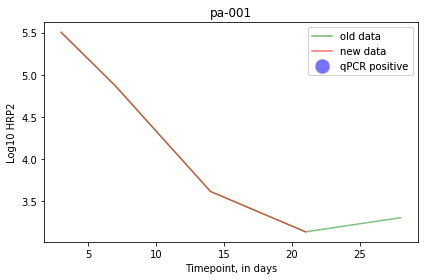

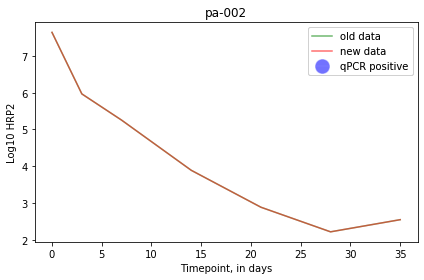

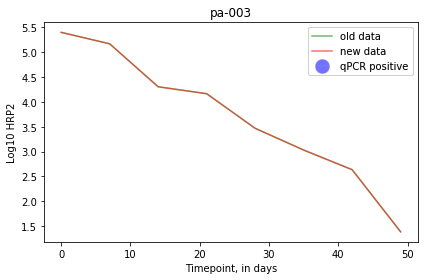

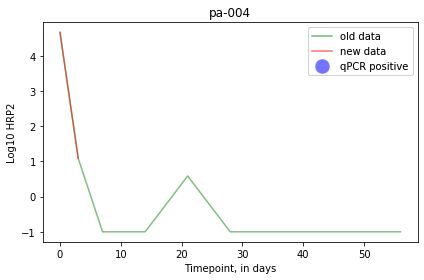

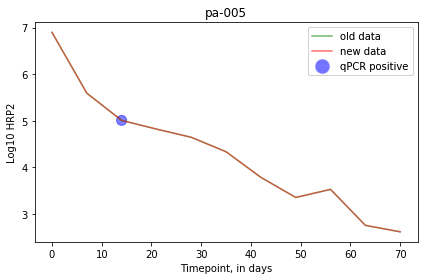

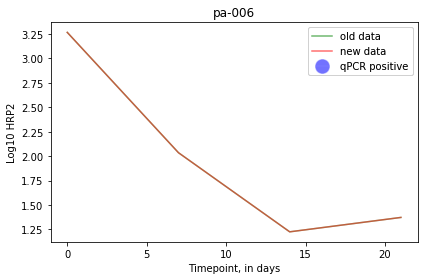

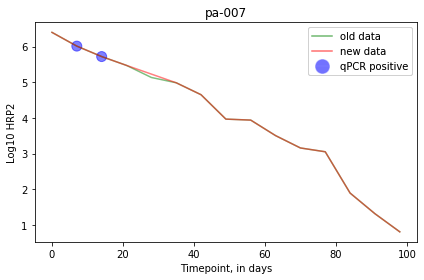

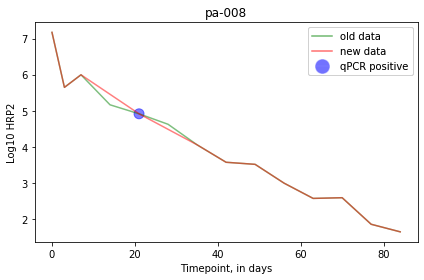

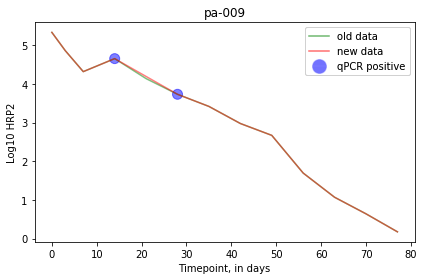

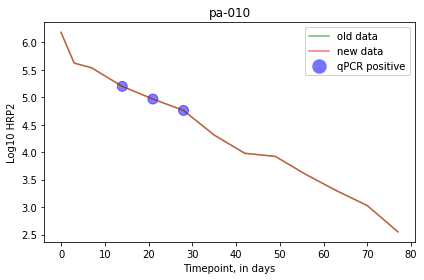

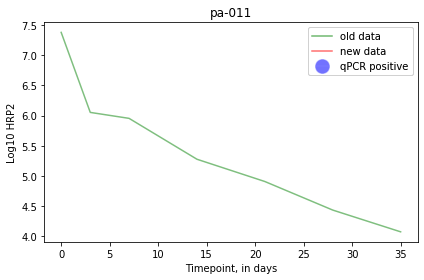

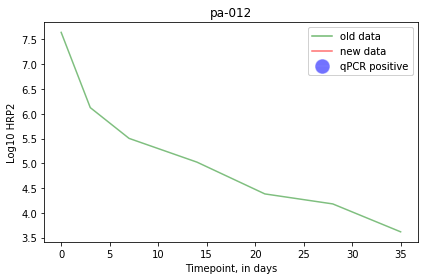

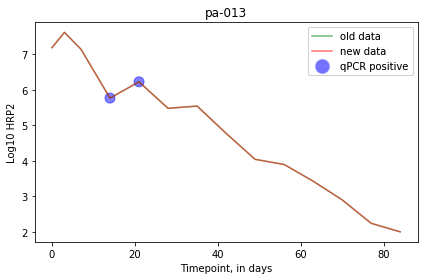

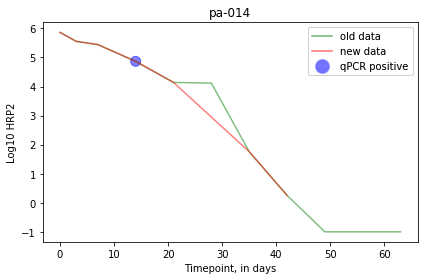

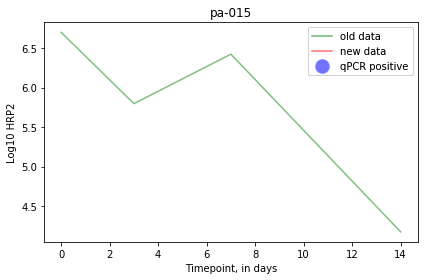

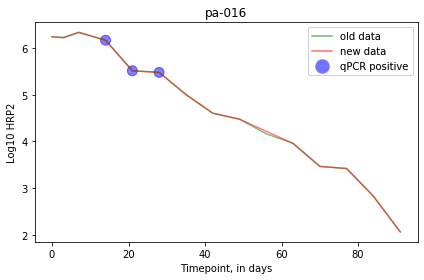

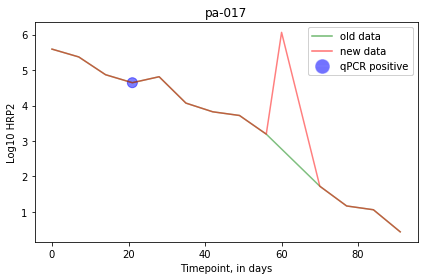

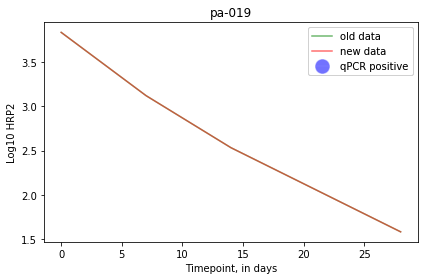

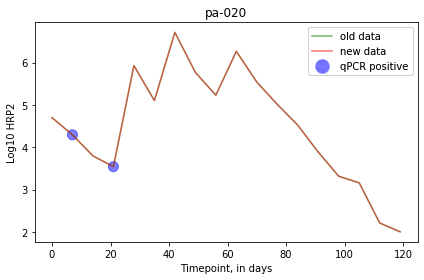

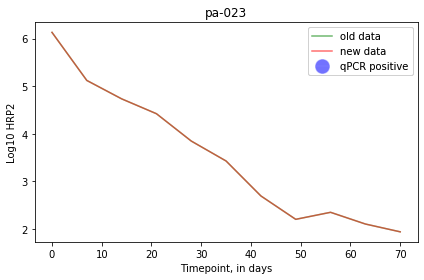

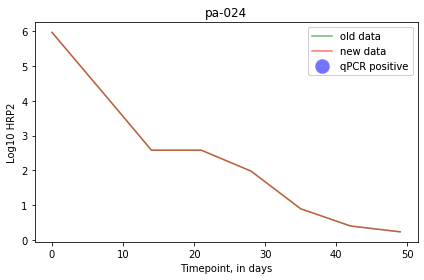

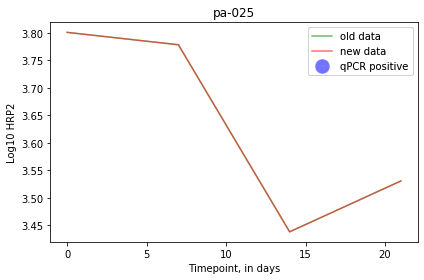

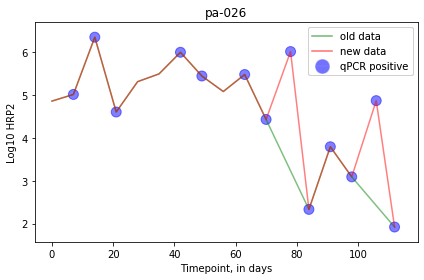

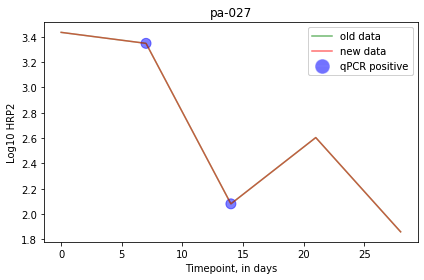

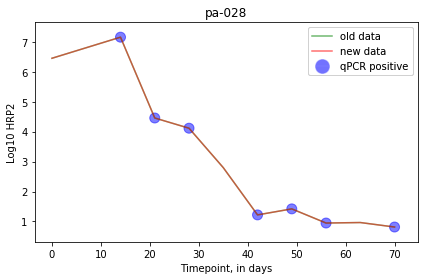

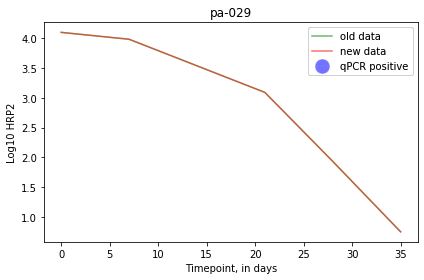

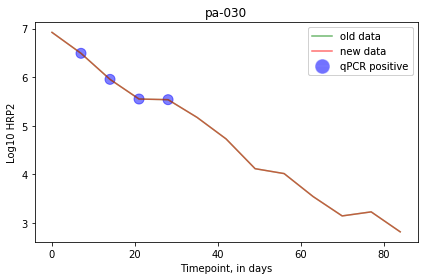

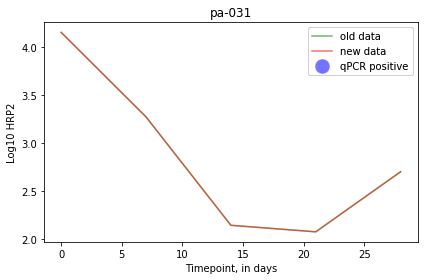

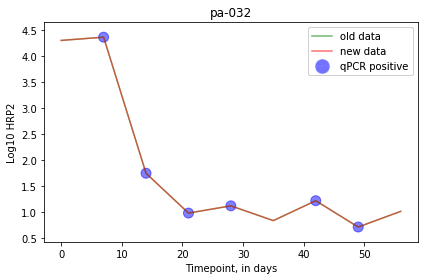

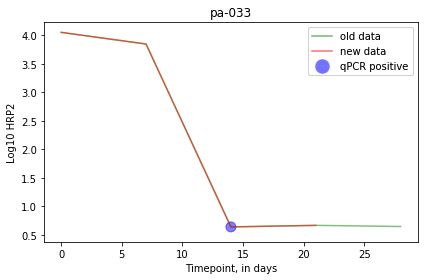

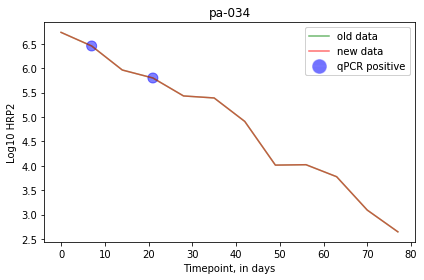

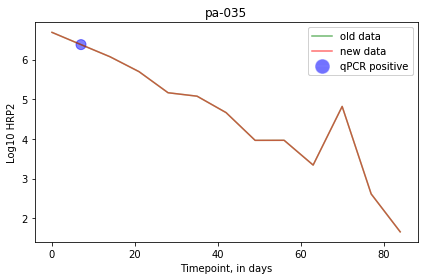

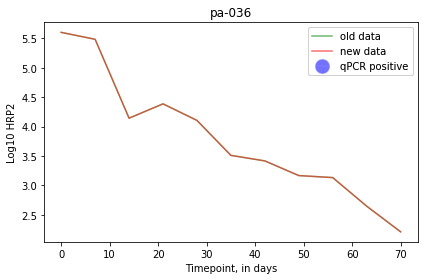

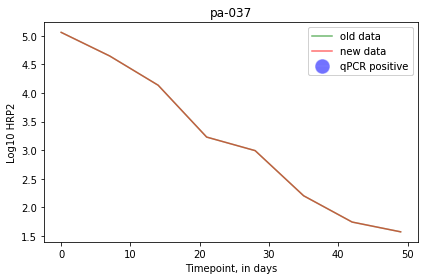

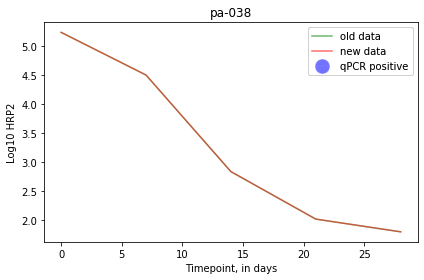

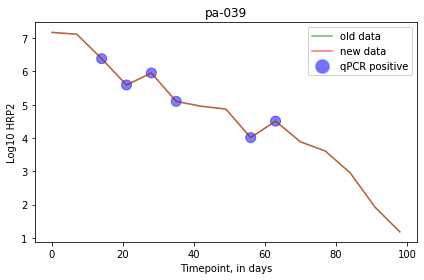

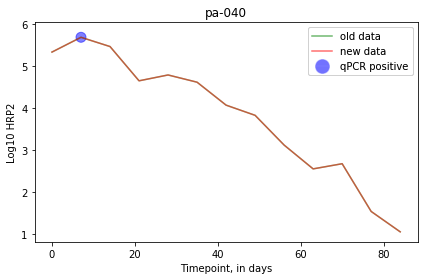

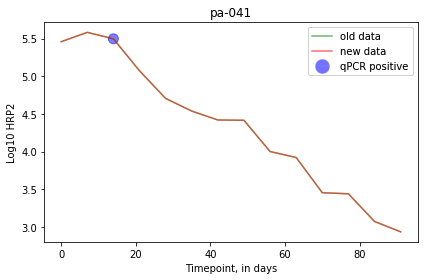

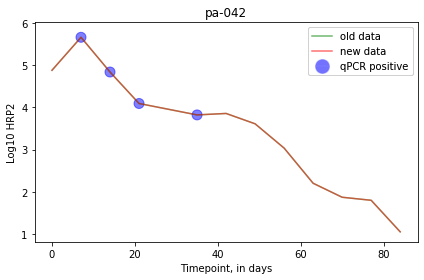

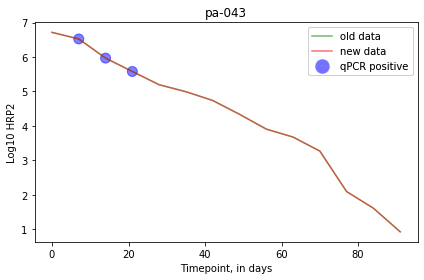

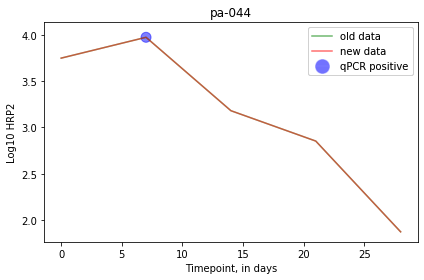

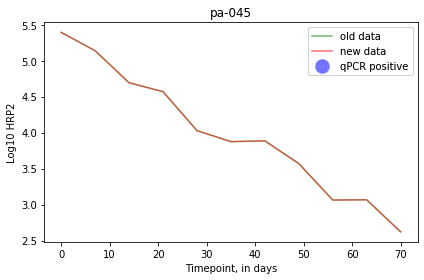

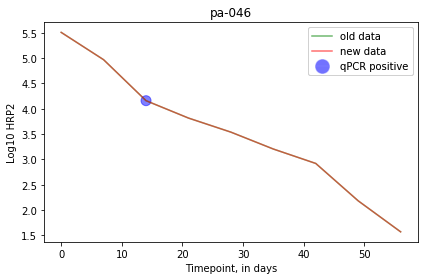

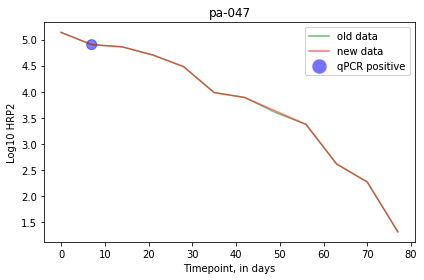

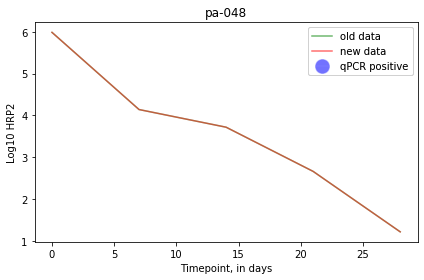

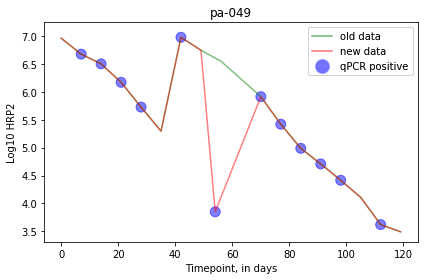

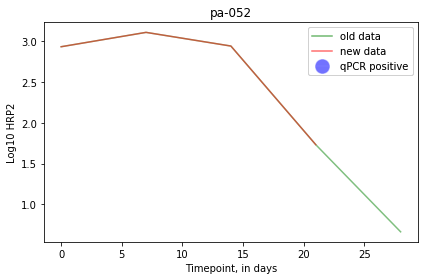

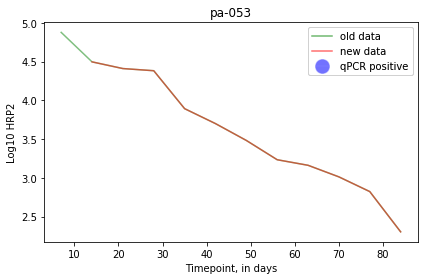

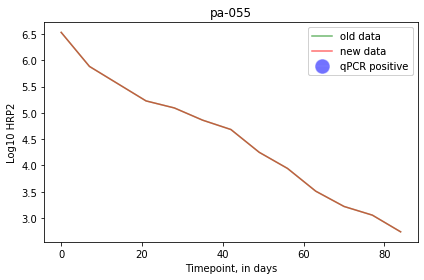

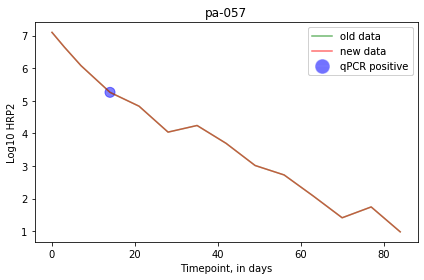

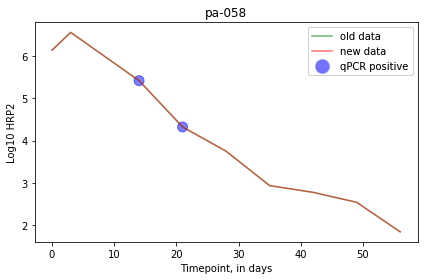

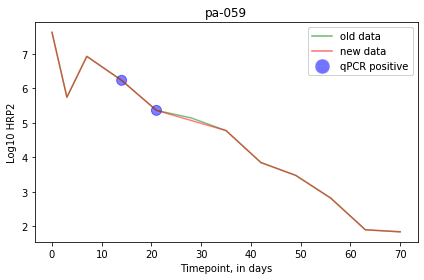

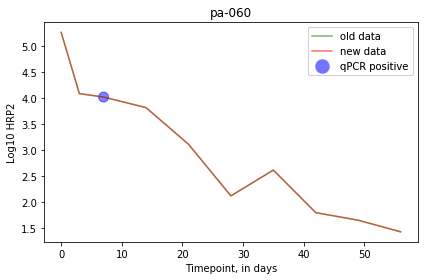

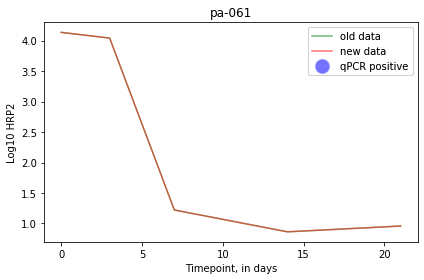

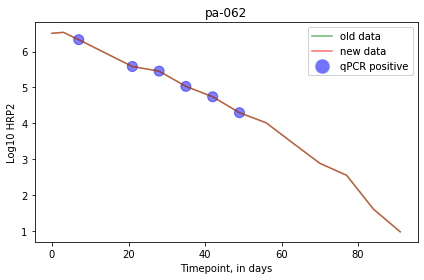

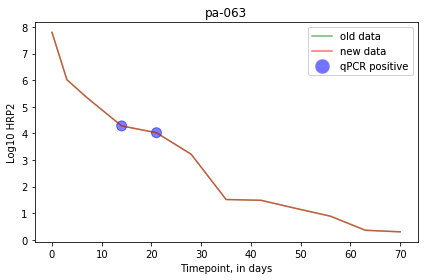

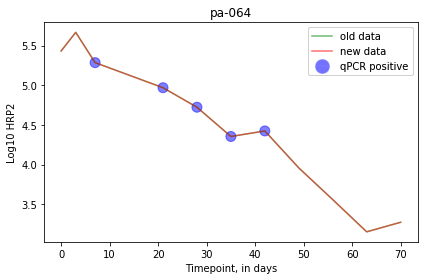

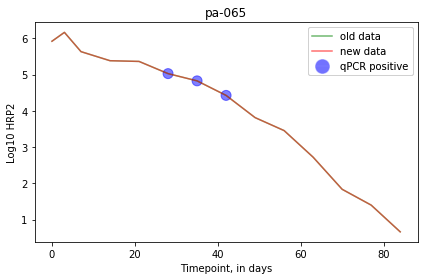

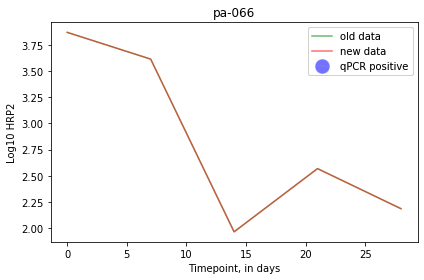

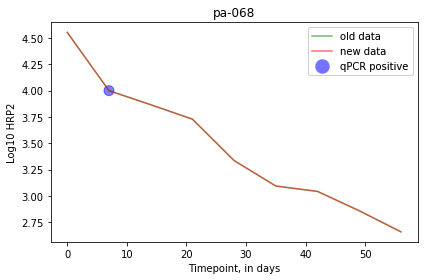

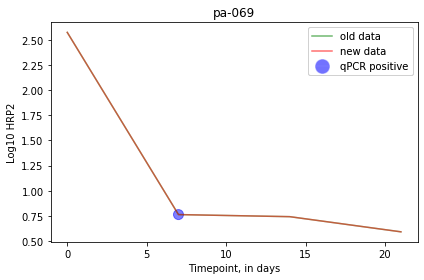

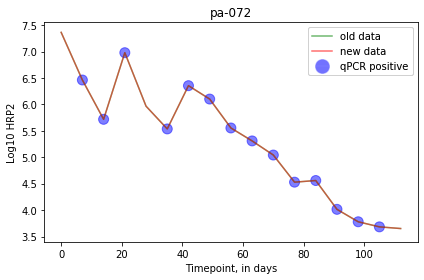

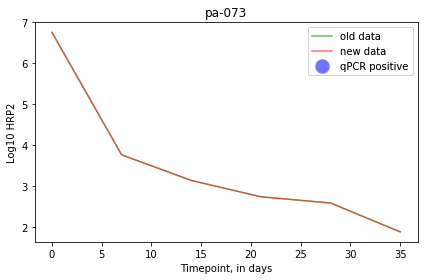

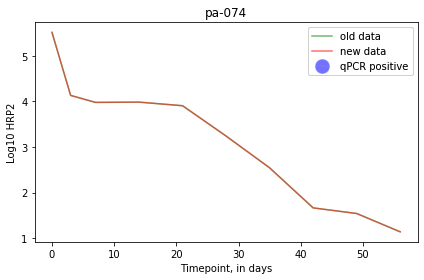

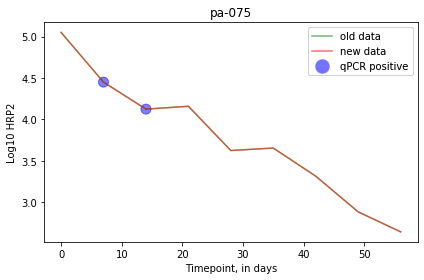

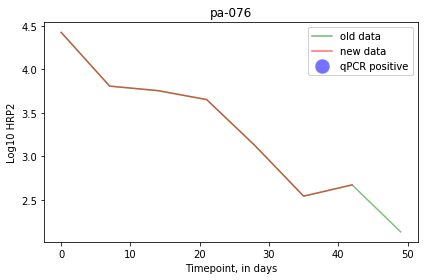

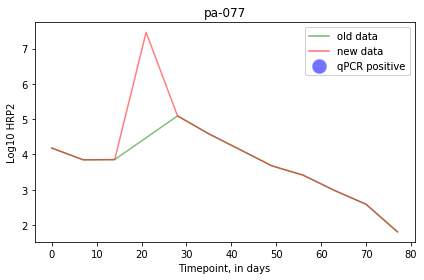

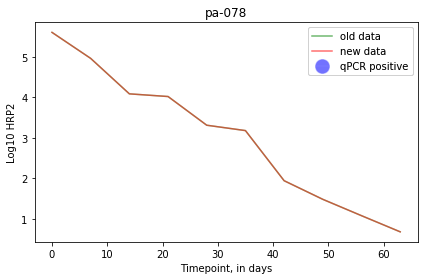

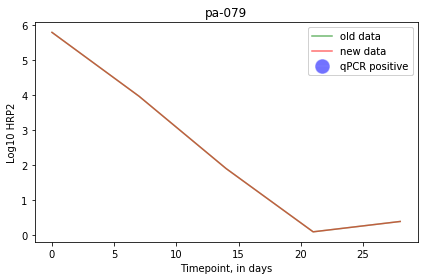

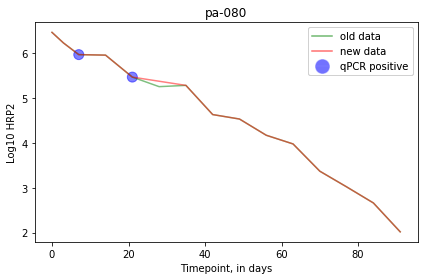

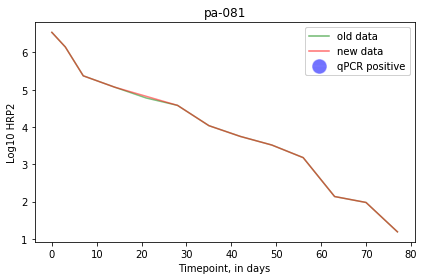

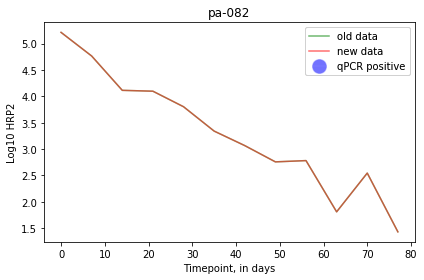

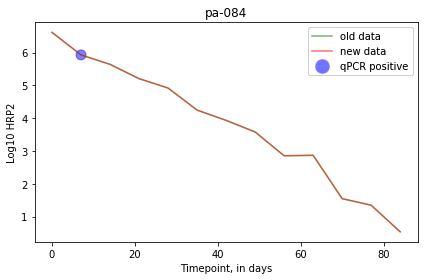

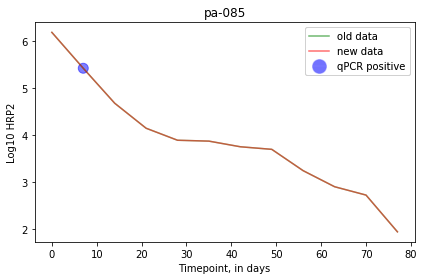

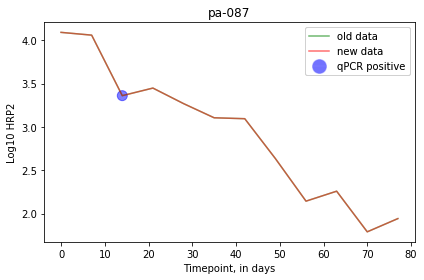

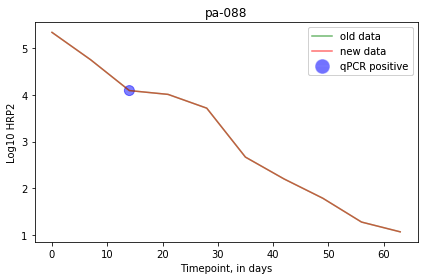

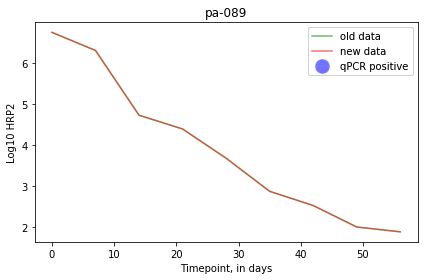

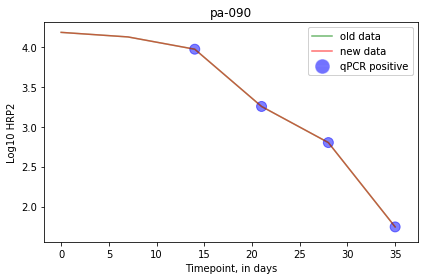

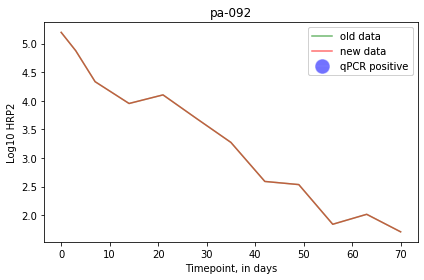

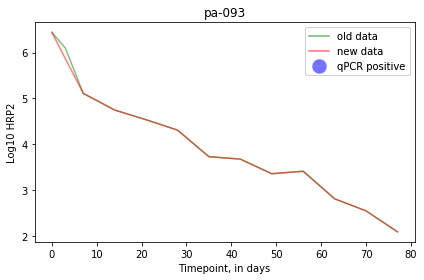

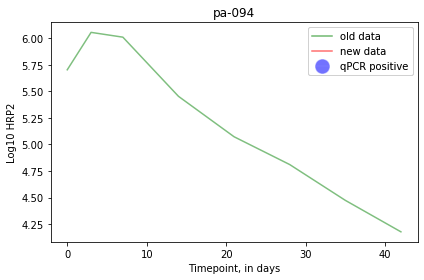

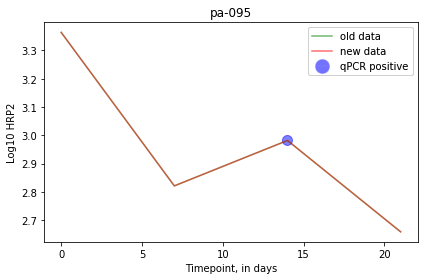

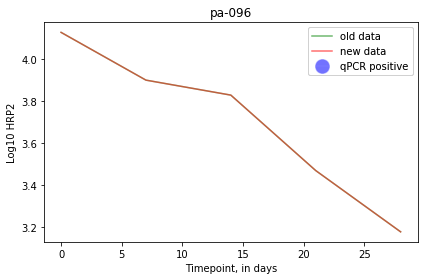

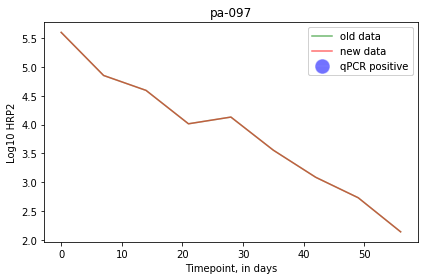

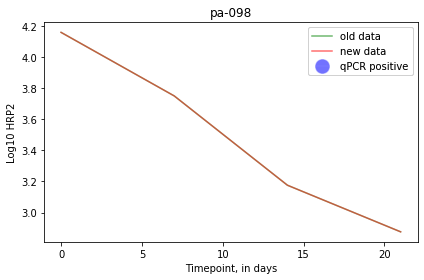

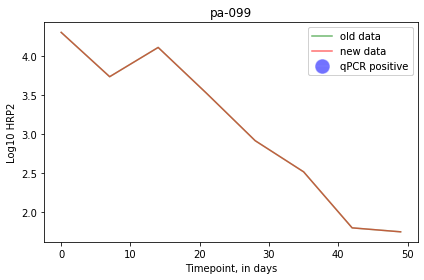

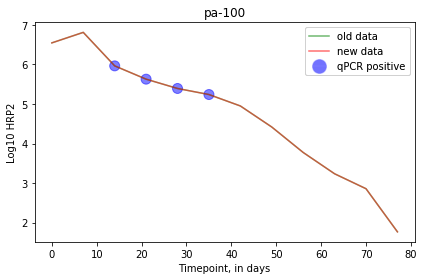

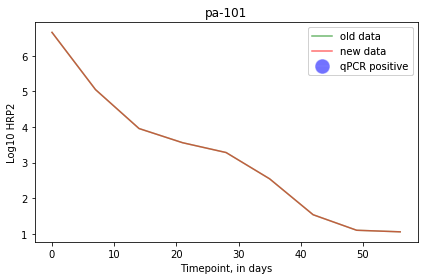

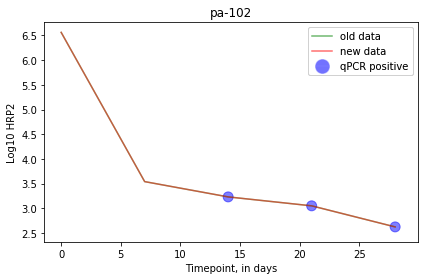

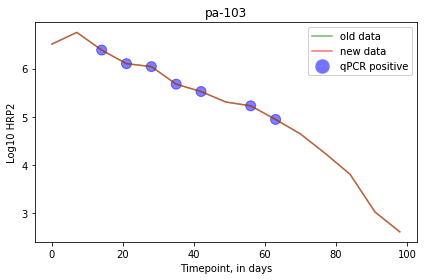

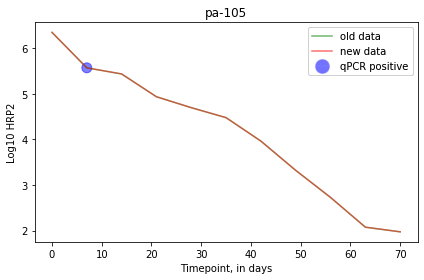

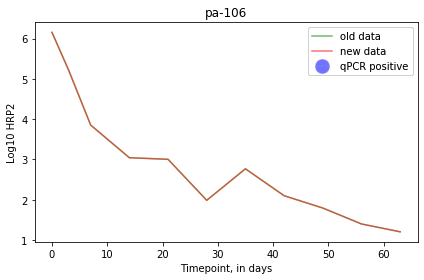

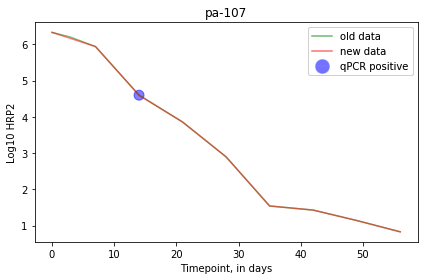

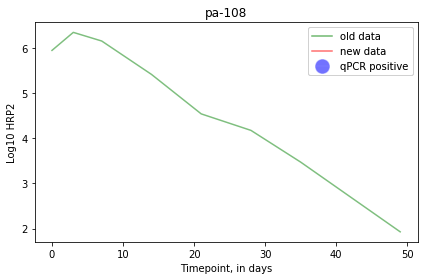

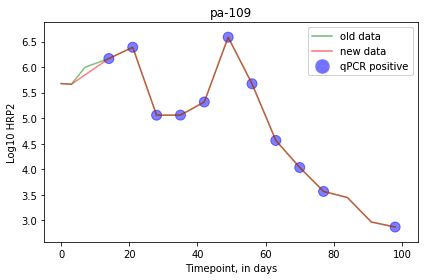

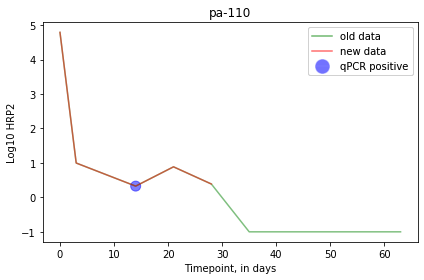

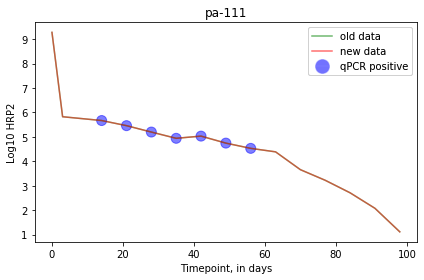

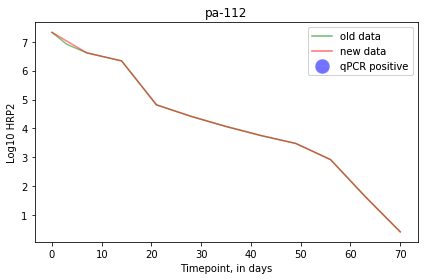

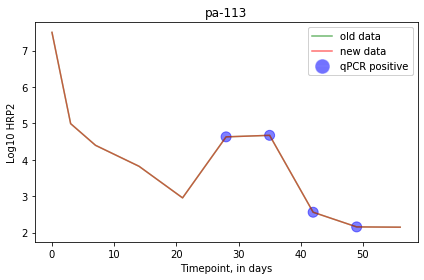

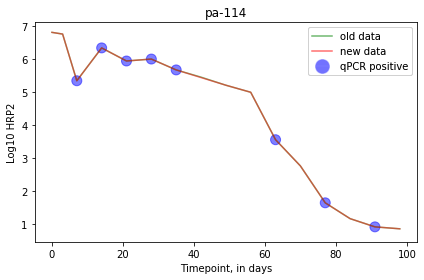

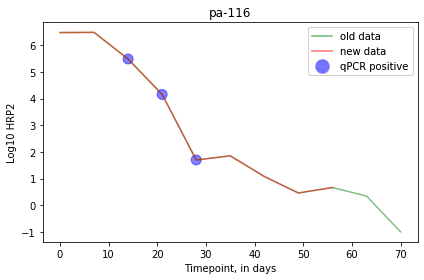

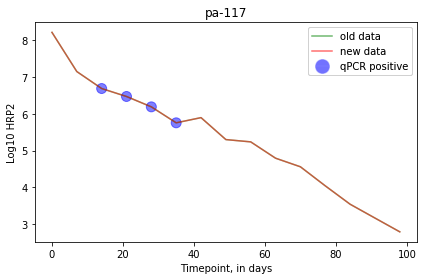

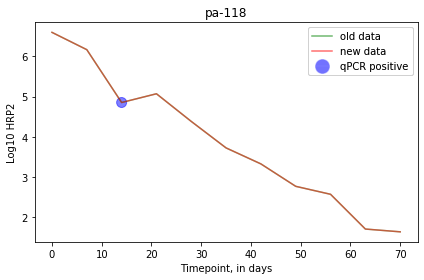

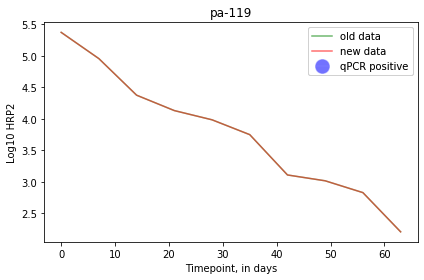

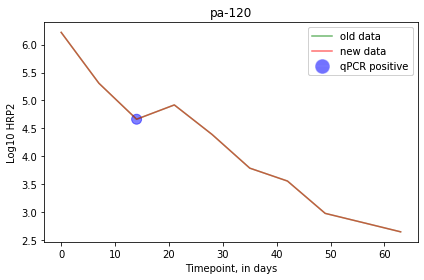

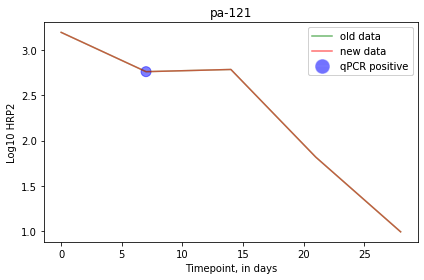

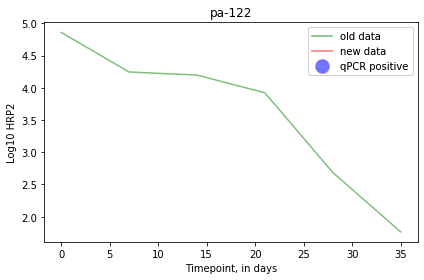

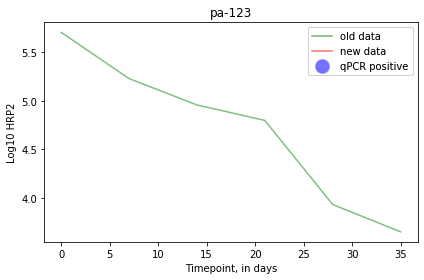

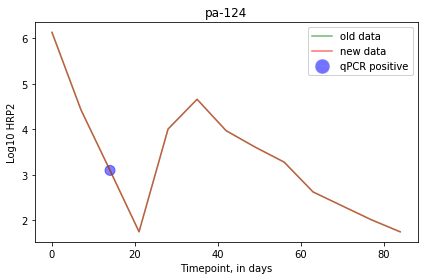

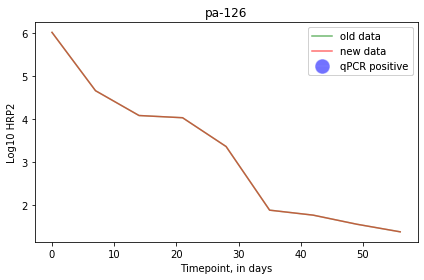

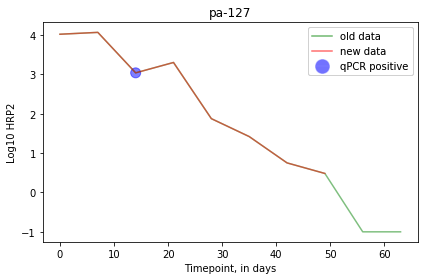

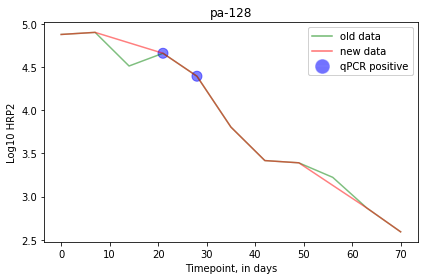

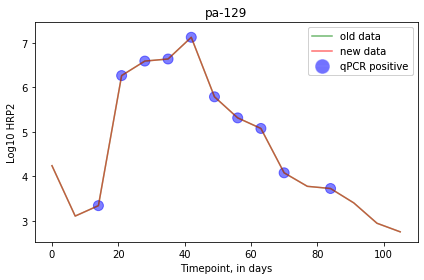

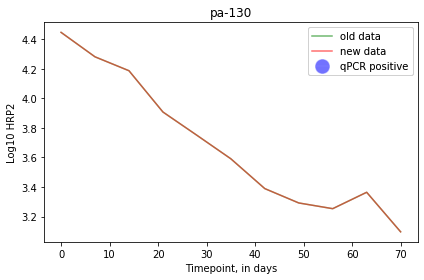

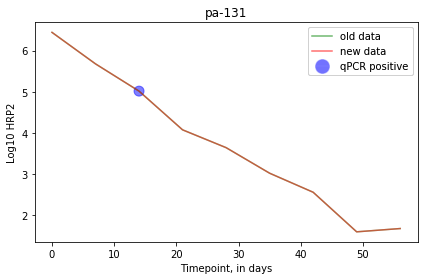

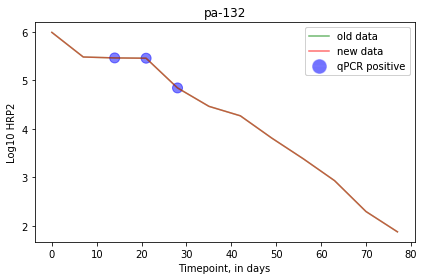

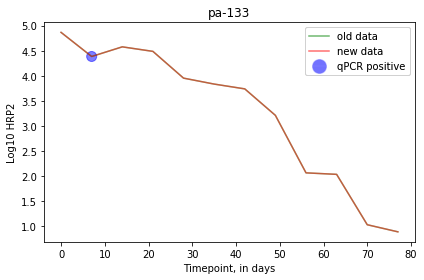

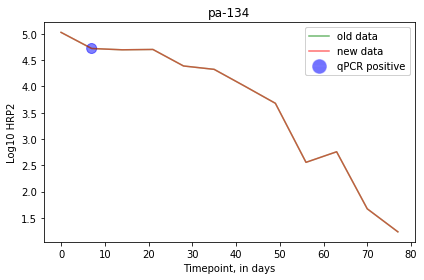

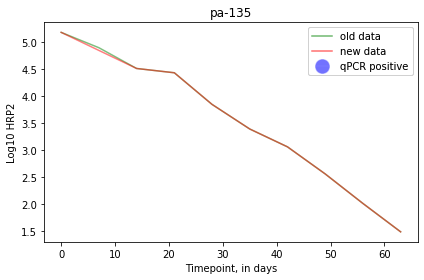

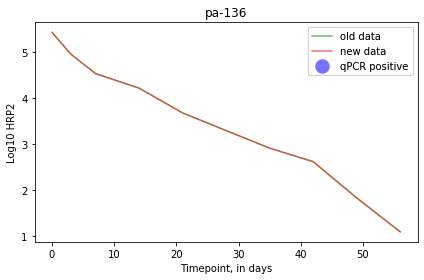

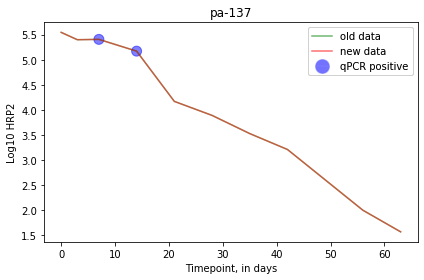

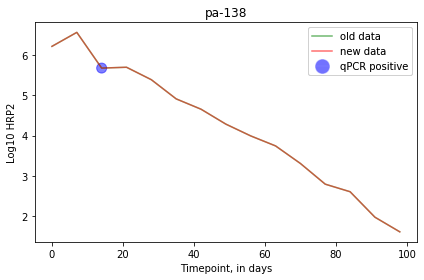

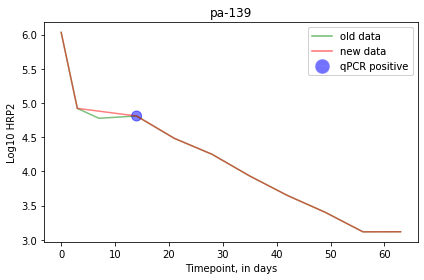

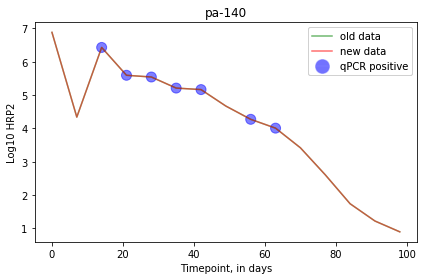

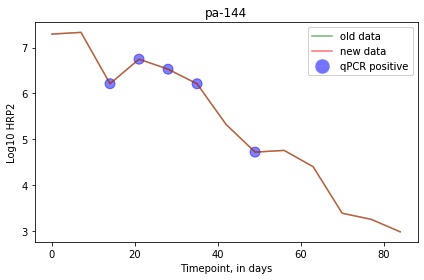

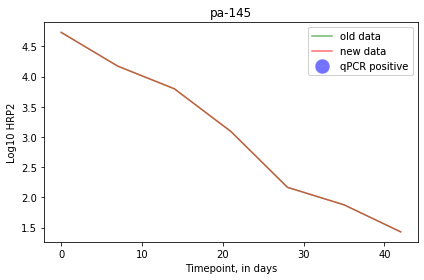

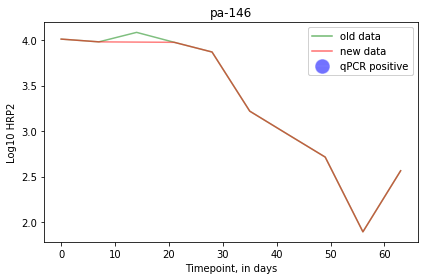

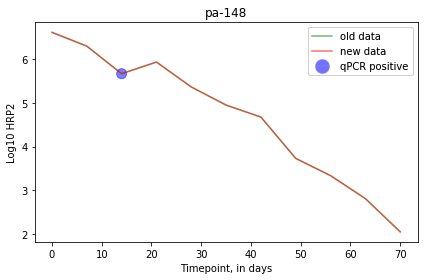

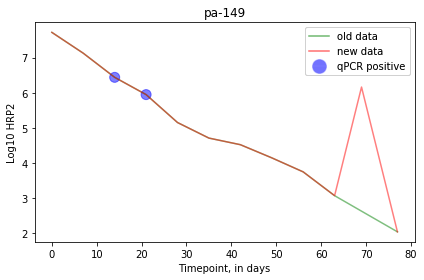

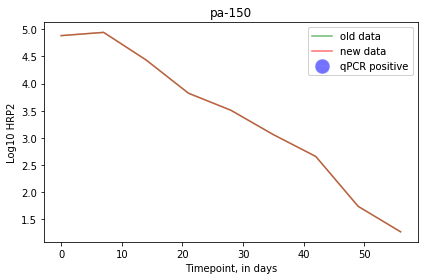

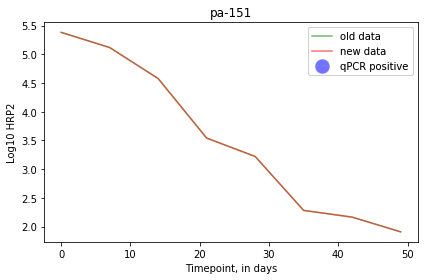

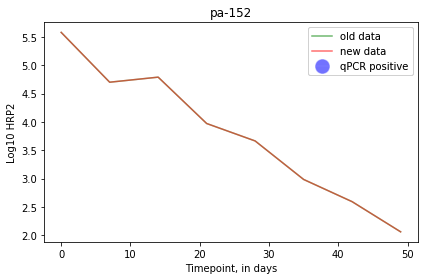

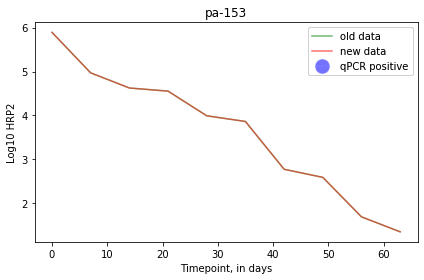

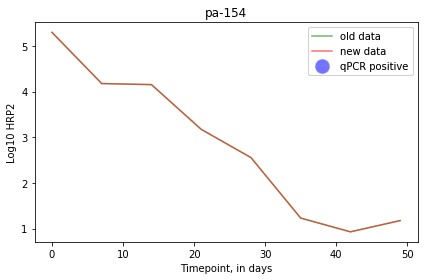

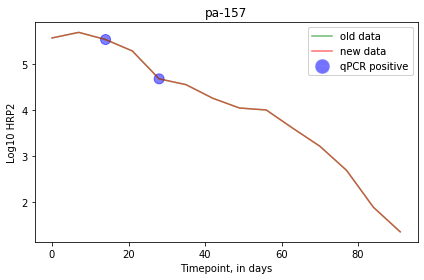

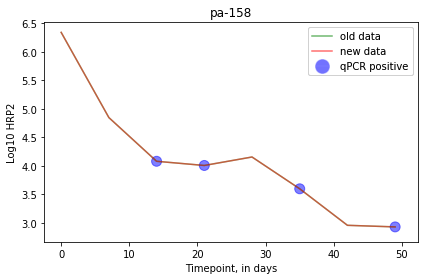

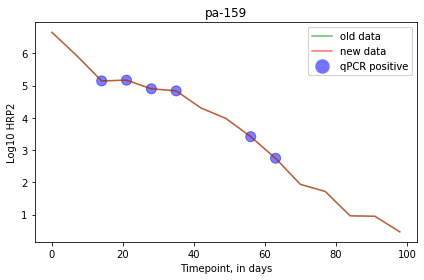

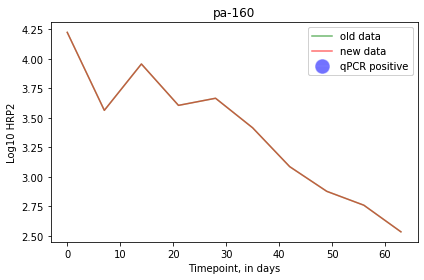

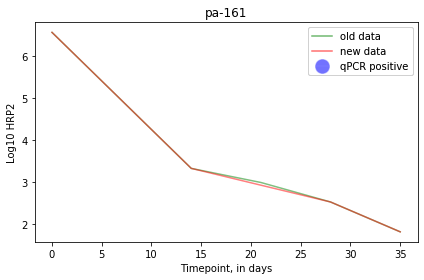

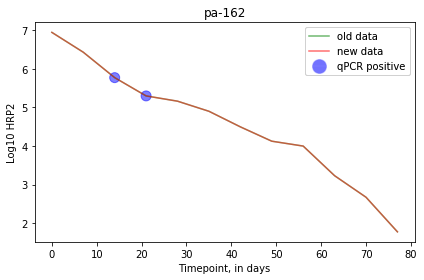

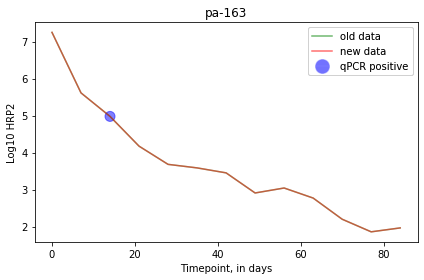

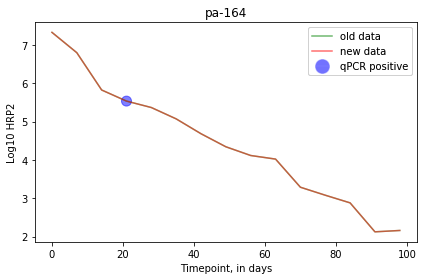

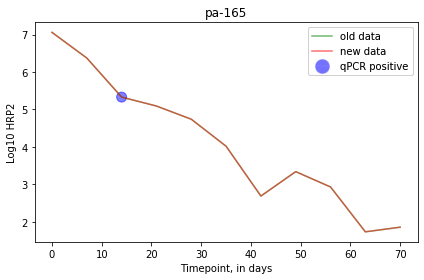

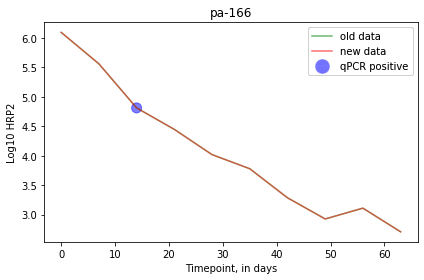

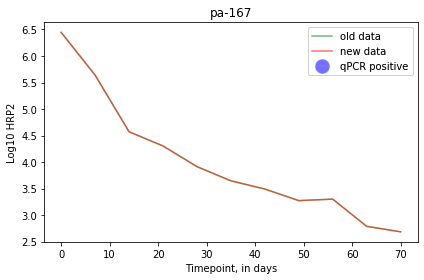

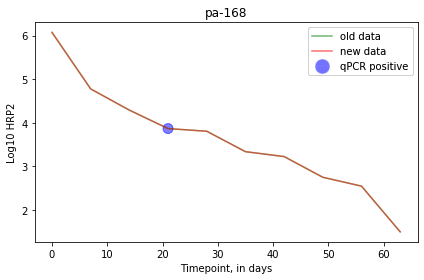

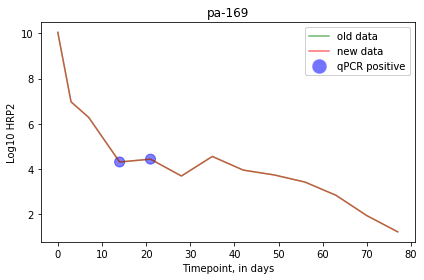

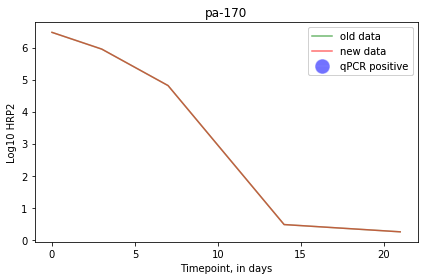

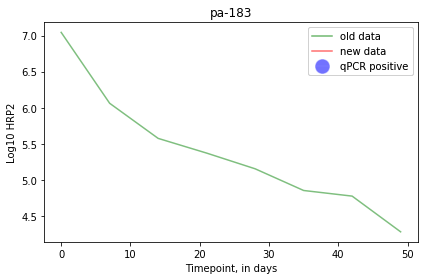

In [82]:
pp = PdfPages('C:/Users/lzoeckler/Desktop/nambia_update.pdf')
for pid in base_plot['participant_id'].unique():
    base_sub = base_plot.loc[base_plot['participant_id'] == pid]
    base_sub = base_sub.loc[~base_sub['quansys_HRP2_pg_ml'].isnull()]
    merge_sub = merge_plot.loc[merge_plot['participant_id'] == pid]
    merge_sub = merge_sub.loc[~merge_sub['quansys_HRP2_pg_ml'].isnull()]
    base_sub.sort_values('timepoint_days', inplace=True)
    merge_sub.sort_values('timepoint_days', inplace=True)
    f, ax1 = plt.subplots()
    ax1.plot(base_sub['timepoint_days'], base_sub['quansys_HRP2_pg_ml'],
             color='green', label='old data', alpha=0.5)
    ax1.plot(merge_sub['timepoint_days'], merge_sub['quansys_HRP2_pg_ml'],
             color='red', label='new data', alpha=0.5)
    plt.title(pid)
    ax1.set_xlabel('Timepoint, in days')
    ax1.set_ylabel('Log10 HRP2')
    
    ax1.scatter(merge_sub['timepoint_days'], merge_sub['quansys_HRP2_pg_ml'],
                s=merge_sub['qpcr_p_density'], color='blue', alpha=0.5)
    manual_legend = []
    manual_legend.append(Line2D([0], [10], marker='o', color='g', label='old data',
                                markerfacecolor='w', markersize=0, alpha=0.5))
    manual_legend.append(Line2D([0], [10], marker='o', color='r', label='new data',
                                markerfacecolor='w', markersize=0, alpha=0.5))
    manual_legend.append(Line2D([0], [0], marker='o', color='w', label='qPCR positive',
                                markerfacecolor='blue', markersize=15, alpha=0.5))
    first_legend = plt.legend(handles=manual_legend, loc='best')
    plt.gca().add_artist(first_legend)
    plt.tight_layout()
    plt.show()
    pp.savefig(f)
    plt.close()
pp.close()